In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, classification_report, accuracy_score

In [3]:
data = pd.read_csv("/Users/navamongkoltongta/.kaggle/StartType/Stars.csv")

In [4]:
data.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


## Check type

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


## Label Encoder

In [6]:
le = LabelEncoder()

cat_cols = data.select_dtypes(object)

for col in cat_cols:
    data[col] = le.fit_transform(data[col])

In [7]:
data.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,8,5,0
1,3042,0.000500,0.1542,16.60,8,5,0
2,2600,0.000300,0.1020,18.70,8,5,0
3,2800,0.000200,0.1600,16.65,8,5,0
4,1939,0.000138,0.1030,20.06,8,5,0


In [8]:
data.columns

Index(['Temperature', 'L', 'R', 'A_M', 'Color', 'Spectral_Class', 'Type'], dtype='object')

## Modelling

In [9]:
input = data[['Temperature', 'L', 'R', 'A_M', 'Color', 'Spectral_Class']]
target = data[['Type']]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(input,target,test_size=0.3)

In [11]:
model = RandomForestClassifier().fit(X_train,y_train)

<ipython-input-11-1cc538340c85>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RandomForestClassifier().fit(X_train,y_train)


In [12]:
model.score(X_train, y_train)

1.0

### Model Score

In [13]:
model.score(X_test, y_test)

0.9861111111111112

In [14]:
model.feature_importances_

array([0.10265137, 0.16828754, 0.31053198, 0.32081895, 0.02757535,
       0.07013481])

### Predict and Model Evaluation

In [15]:
pred = model.predict(X_test)

/Users/navamongkoltongta/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

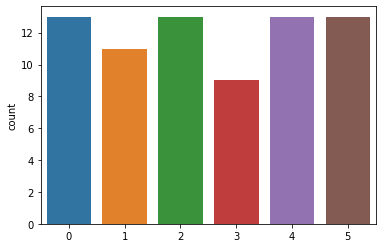

In [29]:
sns.countplot(pred)

In [25]:
#Predict Accuracy
acc = accuracy_score(y_test, pred)
acc

0.9861111111111112

In [24]:
#Error
error = np.sqrt(mean_squared_error(y_test, pred))
error

0.23570226039551584

In [27]:
#Overfitting
overfitting_by = model.score(X_train, y_train)*100 - model.score(X_test, y_test)*100
overfitting_by

1.3888888888888857